# zomato data analyst project

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv("Zomato data .csv")

In [38]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [39]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)

df['rate']=df['rate'].apply(handleRate)
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [41]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


# Type of Resurant

Text(0, 0.5, 'count of resturant')

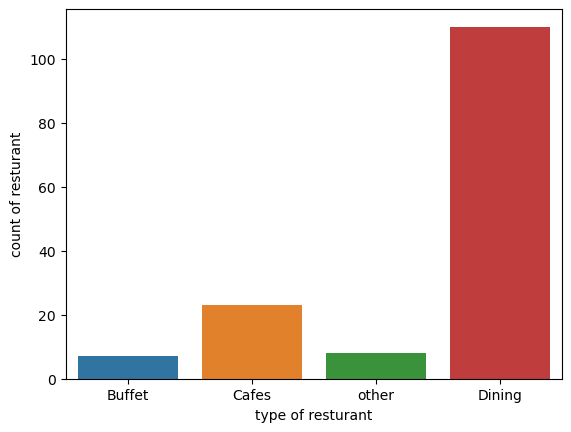

In [42]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("type of resturant")
plt.ylabel("count of resturant")

#plt.legend(loc=9)


# Result :- maximum resturant fall under dinning

Text(0, 0.5, 'votes')

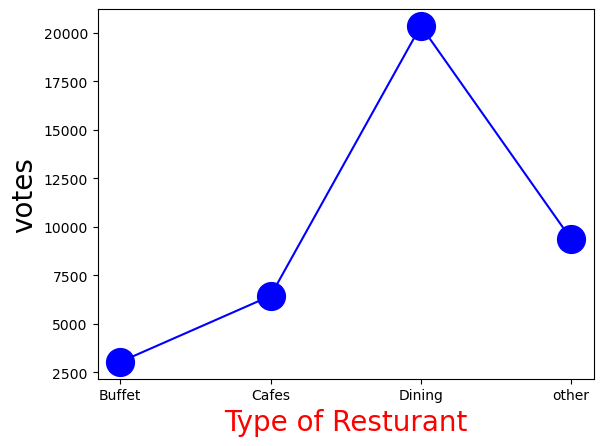

In [54]:

grouped_data = df.groupby('listed_in(type)')['votes'].sum()
#result = pd.df({'votes': grouped_data})

result = pd.DataFrame({'votes': grouped_data})

plt.plot(result, color="blue", marker="o",markersize=20)
plt.xlabel("Type of Resturant", color ="red", size=20)
plt.ylabel("votes",c="black",size=20)

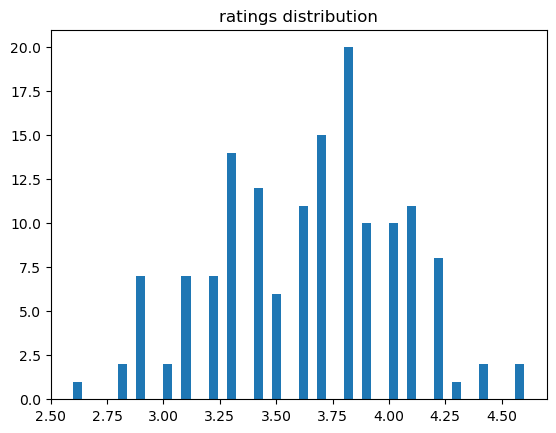

In [63]:
plt.hist(df['rate'],bins = 50)
plt.title("ratings distribution")
plt.show()

# Result:-the majority resturant recieved rating 3.65 to 3.9

Text(0.5, 1.0, 'most order amount')

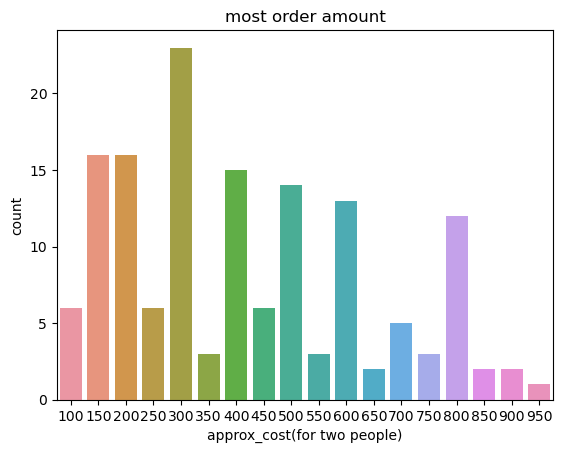

In [69]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)
plt.title("most order amount")

# majority  of couple prefer resturant with approx cost of 300 rupees

<Axes: xlabel='online_order', ylabel='rate'>

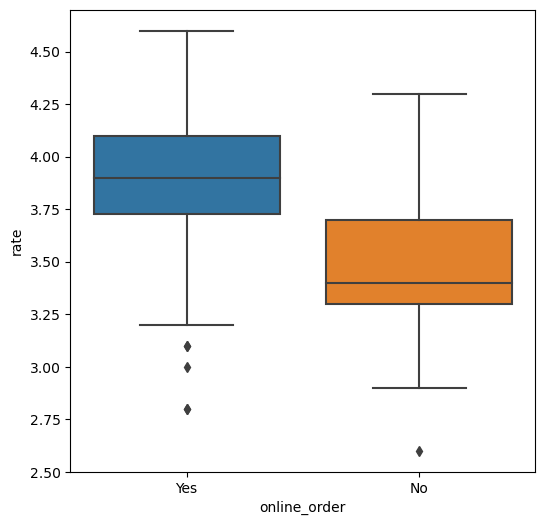

In [70]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=df)

# online order received higher rating in compare to offline order

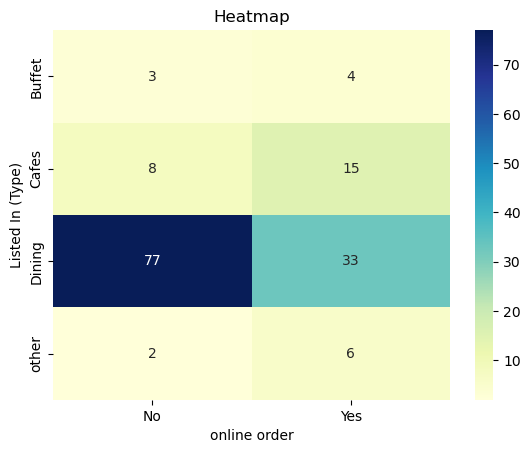

In [75]:
pivot_table=df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap='YlGnBu',fmt='d')
plt.title("Heatmap")
plt.xlabel("online order")
plt.ylabel("Listed In (Type)")
plt.show()